K means implement  
https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

Text(0.5, 1.0, 'Sample Data')

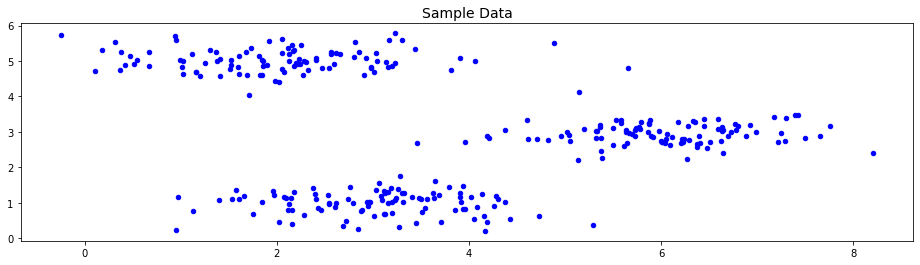

In [2]:
data_frame = pd.read_csv("data_kmeans.txt", header=None, sep=' ') 
np_array = data_frame.iloc[:, :].values # [:, :] => [rows, columns]
X=np_array
x = data_frame.iloc[:, 0].values
y = data_frame.iloc[:, 1].values

plt.figure(figsize=(16, 4))
plt.scatter(x, y, c="b", s=20, )
plt.title('Sample Data', fontsize=14)

# print(np_array)  # print the numpy array
# print(np_array.ndim)

In [3]:
def kmeans(X, k):
    converged = True
    cluster = np.zeros(X.shape[0]) #array contain cluster num of each point
    centroids = data_frame.sample(n=k).values  #pick 3 random points
    a =0 # boucle iteration
    while converged:
        a=a+1
        # for each observation
        for i, row in enumerate(X): #index du point et point
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            converged = False
        else:
            centroids = new_centroids
    print("Iteration : ",a)
    return centroids, cluster

In [4]:
k = 3
centroids, cluster = kmeans(X, k)

Iteration :  8


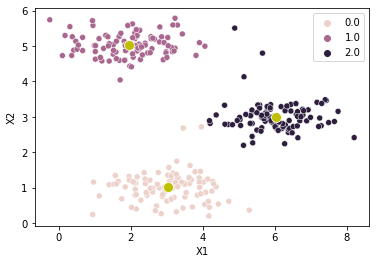

In [5]:
sns.scatterplot(x= X[:,0], y= X[:, 1], hue=cluster)
sns.scatterplot(x= centroids[:,0], y= centroids[:, 1], s=100, color='y')


plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
def kmeansTest(X, k,centroids):
    converged = True
    cluster = np.zeros(X.shape[0]) #array contain cluster num of each point
    # for each observation
    for i, row in enumerate(X): #index du point et point
        mn_dist = float('inf')
        # dist of the point from all centroids
        for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
                mn_dist = d
                cluster[i] = idx
    return centroids, cluster

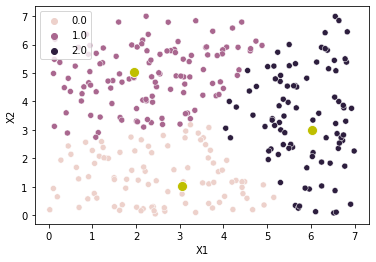

In [10]:
random_data = np.random.rand(300,2)
random_data = random_data*7

data_frame =  pd.DataFrame(random_data)
X=random_data

k = 3
centroids, cluster = kmeansTest(X, k,centroids)
sns.scatterplot(x= X[:,0], y= X[:, 1], hue=cluster)
sns.scatterplot(x= centroids[:,0], y= centroids[:, 1], s=100, color='y')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()